In [11]:
import pandas as pd
import numpy as np
import os

In [12]:
train_files = [f'train_FD00{i}.txt' for i in range(1, 5)]
test_files = [f'test_FD00{i}.txt' for i in range(1, 5)]
rul_files = [f'RUL_FD00{i}.txt' for i in range(1, 5)]

In [13]:
def load_dataset(filename):
    return pd.read_csv( filename ,delim_whitespace=True, header=None)

train_dfs = [load_dataset(file) for file in train_files]
test_dfs = [load_dataset(file) for file in test_files]
rul_dfs = [load_dataset(file) for file in rul_files]

C:\Users\takhiuddin\AppData\Local\Temp\ipykernel_28380\26103341.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv( filename ,delim_whitespace=True, header=None)
C:\Users\takhiuddin\AppData\Local\Temp\ipykernel_28380\26103341.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv( filename ,delim_whitespace=True, header=None)
C:\Users\takhiuddin\AppData\Local\Temp\ipykernel_28380\26103341.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv( filename ,delim_whitespace=True, header=None)
C:\Users\takhiuddin\AppData\Local\Temp\ipykernel_28380\26103341.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

In [14]:
column_names = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2',
                'operational_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]

for df in train_dfs + test_dfs:
    df.columns = column_names

In [15]:
train_dfs

[       unit_number  time_in_cycles  operational_setting_1  \
 0                1               1                -0.0007   
 1                1               2                 0.0019   
 2                1               3                -0.0043   
 3                1               4                 0.0007   
 4                1               5                -0.0019   
 ...            ...             ...                    ...   
 20626          100             196                -0.0004   
 20627          100             197                -0.0016   
 20628          100             198                 0.0004   
 20629          100             199                -0.0011   
 20630          100             200                -0.0032   
 
        operational_setting_2  operational_setting_3  sensor_1  sensor_2  \
 0                    -0.0004                  100.0    518.67    641.82   
 1                    -0.0003                  100.0    518.67    642.15   
 2                     0.0

In [17]:
processed_train=pd.read_csv('processed_train_FD001.csv')
processed_train.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0


In [19]:
processed_train.dropna(inplace=True)  # Drop rows with NaN values

In [20]:
from sklearn.model_selection import train_test_split
def prepare_data(df):
    X = df.drop(columns=['RUL'])  # Exclude the target variable
    y = df['RUL']
    
    return train_test_split(X, y, test_size=0.2, random_state=42) 


In [21]:
train_splits1 = [prepare_data(processed_train)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

for X_train, X_test, y_train, y_test in train_splits1:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)

    # Print the evaluation metrics
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)
    print('R-Squared:', r_squared)
    print('Median Absolute Error:', median_ae)


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import numpy as np

# Assuming train_splits1 is already defined
X_train, X_test, y_train, y_test = zip(*train_splits1)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train[0], y_train[0])

# Make predictions
y_pred = model.predict(X_test[0])

# Calculate evaluation metrics
mse = mean_squared_error(y_test[0], y_pred)
mae = mean_absolute_error(y_test[0], y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test[0], y_pred)
median_ae = median_absolute_error(y_test[0], y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r_squared)
print('Median Absolute Error:', median_ae)


Mean Squared Error: 259.4696690816574
Mean Absolute Error: 11.014846135207174
Root Mean Squared Error: 16.108062238570394
R-Squared: 0.9432082940903957
Median Absolute Error: 7.3799999999999955


In [23]:
import joblib
joblib.dump(model, 'rul_predictor_model.joblib')

['rul_predictor_model.joblib']

In [25]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('rul_predictor_model.joblib')

# Function to make predictions from manual input
def predict_rul(manual_input):
    # Reshape the input to match the model's expected input
    input_array = np.array(manual_input).reshape(1, -1)
    
    # Make prediction
    predicted_rul = model.predict(input_array)
    
    return predicted_rul[0]

# Example of how to take manual input (adjust based on your feature set)
# Replace the list below with the correct number of features
manual_input = [
    4,   # unit_number or relevant identifier
    72,  # cycle
    -0.002,  # operational setting 1
    0.0002, # operational setting 2
    100,  # operational setting 3
    # Add the rest of the sensor measurements
    518.67, # sensor_1
    642.69, # sensor_2
    1584.72, # sensor_3
    1408.21, # sensor_4
    14.62, # sensor_5
    21.61, # sensor_6
    553.62, # sensor_7
    2388.07, # sensor_8
    9052.99, # sensor_9
    1.3, # sensor_10
    47.27, # sensor_11
    521.5, # sensor_12
    2388.09, # sensor_13
    8140.48, # sensor_14
    8.4053, # sensor_15
    0.03, # sensor_16
    394, # sensor_17
    2388, # sensor_18
    100, # sensor_19
    38.89, # sensor_20
    23.3367, # sensor_21
]

# Predict RUL
predicted_rul = predict_rul(manual_input)
print('Predicted Remaining Useful Life (RUL):', predicted_rul)


Predicted Remaining Useful Life (RUL): 117.72


d:\Shifted\NASA\venv4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


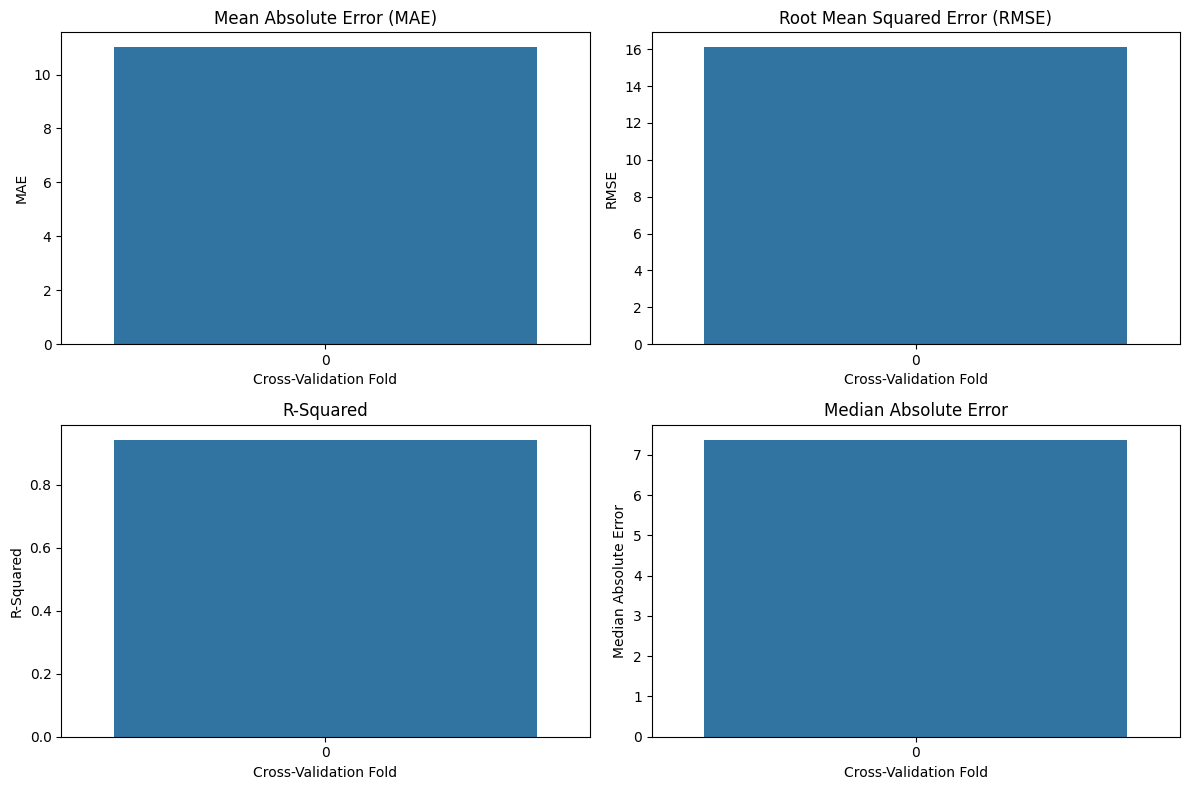

AttributeError: 'tuple' object has no attribute 'min'

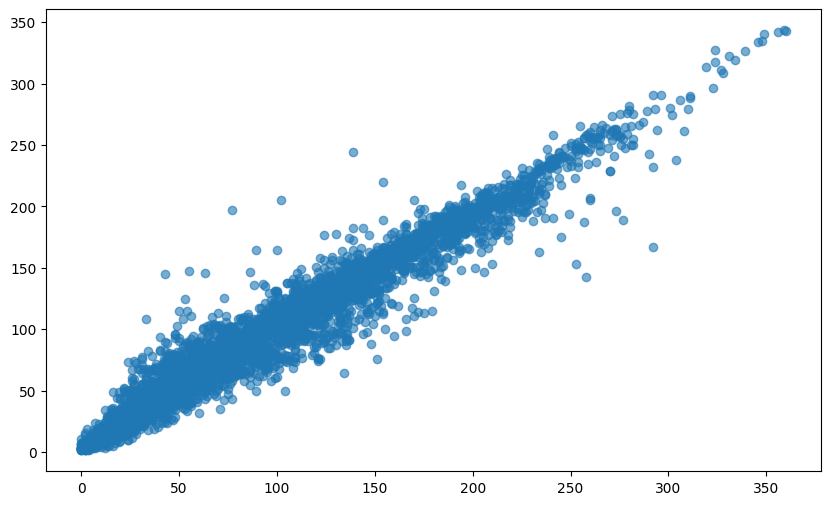

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

mse_list = []
mae_list = []
rmse_list = []
r_squared_list = []
median_ae_list = []

mse_list.append(mse)
mae_list.append(mae)
rmse_list.append(rmse)
r_squared_list.append(r_squared)
median_ae_list.append(median_ae)

# Plotting the metrics
plt.figure(figsize=(12, 8))

# Plot MAE
plt.subplot(2, 2, 1)
sns.barplot(x=range(len(mae_list)), y=mae_list)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Cross-Validation Fold')

# Plot RMSE
plt.subplot(2, 2, 2)
sns.barplot(x=range(len(rmse_list)), y=rmse_list)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Cross-Validation Fold')

# Plot R-Squared
plt.subplot(2, 2, 3)
sns.barplot(x=range(len(r_squared_list)), y=r_squared_list)
plt.title('R-Squared')
plt.ylabel('R-Squared')
plt.xlabel('Cross-Validation Fold')

# Plot Median Absolute Error
plt.subplot(2, 2, 4)
sns.barplot(x=range(len(median_ae_list)), y=median_ae_list)
plt.title('Median Absolute Error')
plt.ylabel('Median Absolute Error')
plt.xlabel('Cross-Validation Fold')

plt.tight_layout()
plt.show()

# Plot Predictions vs Actual RUL
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.title('Predicted vs Actual RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.axis('equal')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()